In [285]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2
import os
import glob

In [286]:
inputfolder = 'dataset/Cyst'
os.makedirs('resized dataset/Resized Folder 64x64/Cyst', exist_ok=True)

i = 1

for img in glob.glob(inputfolder + "/*.jpg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (64, 64))
    cv2.imwrite("resized dataset/Resized Folder 64x64/Cyst/Cyst- (%i).jpg" % i, imgResized)
    i += 1

KeyboardInterrupt: 

In [ ]:
inputfolder = 'dataset/Normal'
os.makedirs('resized dataset/Resized Folder 64x64/Normal', exist_ok=True)

i = 1

for img in glob.glob(inputfolder + "/*.jpg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (64, 64))
    cv2.imwrite("resized dataset/Resized Folder 64x64/Normal/Normal- (%i).jpg" % i, imgResized)
    i += 1

In [ ]:
inputfolder = 'dataset/Stone'
os.makedirs('resized dataset/Resized Folder 64x64/Stone', exist_ok=True)

i = 1

for img in glob.glob(inputfolder + "/*.jpg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (64, 64))
    cv2.imwrite("resized dataset/Resized Folder 64x64/Stone/Stone- (%i).jpg" % i, imgResized)
    i += 1

In [ ]:
inputfolder = 'dataset/Tumor'
os.makedirs('resized dataset/Resized Folder 64x64/Tumor', exist_ok=True)

i = 1

for img in glob.glob(inputfolder + "/*.jpg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (64, 64))
    cv2.imwrite("resized dataset/Resized Folder 64x64/Tumor/Tumor- (%i).jpg" % i, imgResized)
    i += 1

In [ ]:
data_dir = Path('resized dataset/Resized Folder 64x64')
train_dir = data_dir

In [ ]:
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [ ]:
Normal_Cases = Normal_Cases_dir.glob('*.jpg') 
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg') 
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')

In [ ]:
train_data = []

In [ ]:
for img in Cyst_Cases:
    train_data.append((img, 0))

for img in Normal_Cases:
    train_data.append((img, 1))

for img in Stone_Cases:
    train_data.append((img, 2))

for img in Tumor_Cases:
    train_data.append((img, 3))


In [ ]:
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)
train_data

,image,label
0,resized dataset/Resized Folder 64x64/Cyst/Cyst...,0
1,resized dataset/Resized Folder 64x64/Cyst/Cyst...,0
2,resized dataset/Resized Folder 64x64/Cyst/Cyst...,0
3,resized dataset/Resized Folder 64x64/Cyst/Cyst...,0
4,resized dataset/Resized Folder 64x64/Cyst/Cyst...,0
...,...,...
12441,resized dataset/Resized Folder 64x64/Tumor/Tum...,3
12442,resized dataset/Resized Folder 64x64/Tumor/Tum...,3
12443,resized dataset/Resized Folder 64x64/Tumor/Tum...,3
12444,resized dataset/Resized Folder 64x64/Tumor/Tum...,3


In [ ]:
train_data = train_data.sample(frac=1.).reset_index(drop=True) 
train_data.head()

,image,label
0,resized dataset/Resized Folder 64x64/Cyst/Cyst...,0
1,resized dataset/Resized Folder 64x64/Cyst/Cyst...,0
2,resized dataset/Resized Folder 64x64/Cyst/Cyst...,0
3,resized dataset/Resized Folder 64x64/Cyst/Cyst...,0
4,resized dataset/Resized Folder 64x64/Normal/No...,1


In [ ]:
train_data['label'].unique()

array([0, 1, 2, 3])

In [ ]:
train_data.shape

(12446, 2)

In [ ]:
cases_count = train_data['label'].value_counts()
cases_count

label
1    5077
0    3709
3    2283
2    1377
Name: count, dtype: int64

/var/folders/m4/0yq10js97k90dzpb9_y3tfzc0000gn/T/ipykernel_4897/707280772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = cases_count.index, y = cases_count.values, palette='bright', edgecolor='black')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this war

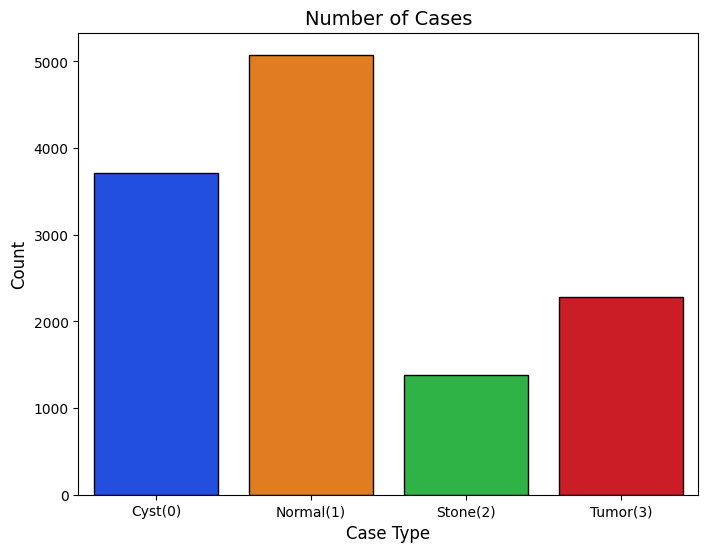

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(x = cases_count.index, y = cases_count.values, palette='bright', edgecolor='black')
plt.title('Number of Cases', fontsize=14)
plt.xlabel('Case Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count.index)),['Cyst(0)', 'Normal(1)','Stone(2)','Tumor(3)'])
plt.show()

In [ ]:
Cyst_Samples = (train_data[train_data['label'] == 0]['image'].iloc[:5]).tolist()
Normal_Samples = (train_data[train_data['label'] == 1]['image'].iloc[:5]).tolist()
Stone_Samples = (train_data[train_data['label'] == 2]['image'].iloc[:5]).tolist()
Tumor_Samples = (train_data[train_data['label'] == 3]['image'].iloc[:5]).tolist()
#print(Cyst_Samples)

samples = Cyst_Samples + Normal_Samples + Stone_Samples + Tumor_Samples

del Cyst_Samples, Normal_Samples, Stone_Samples, Tumor_Samples



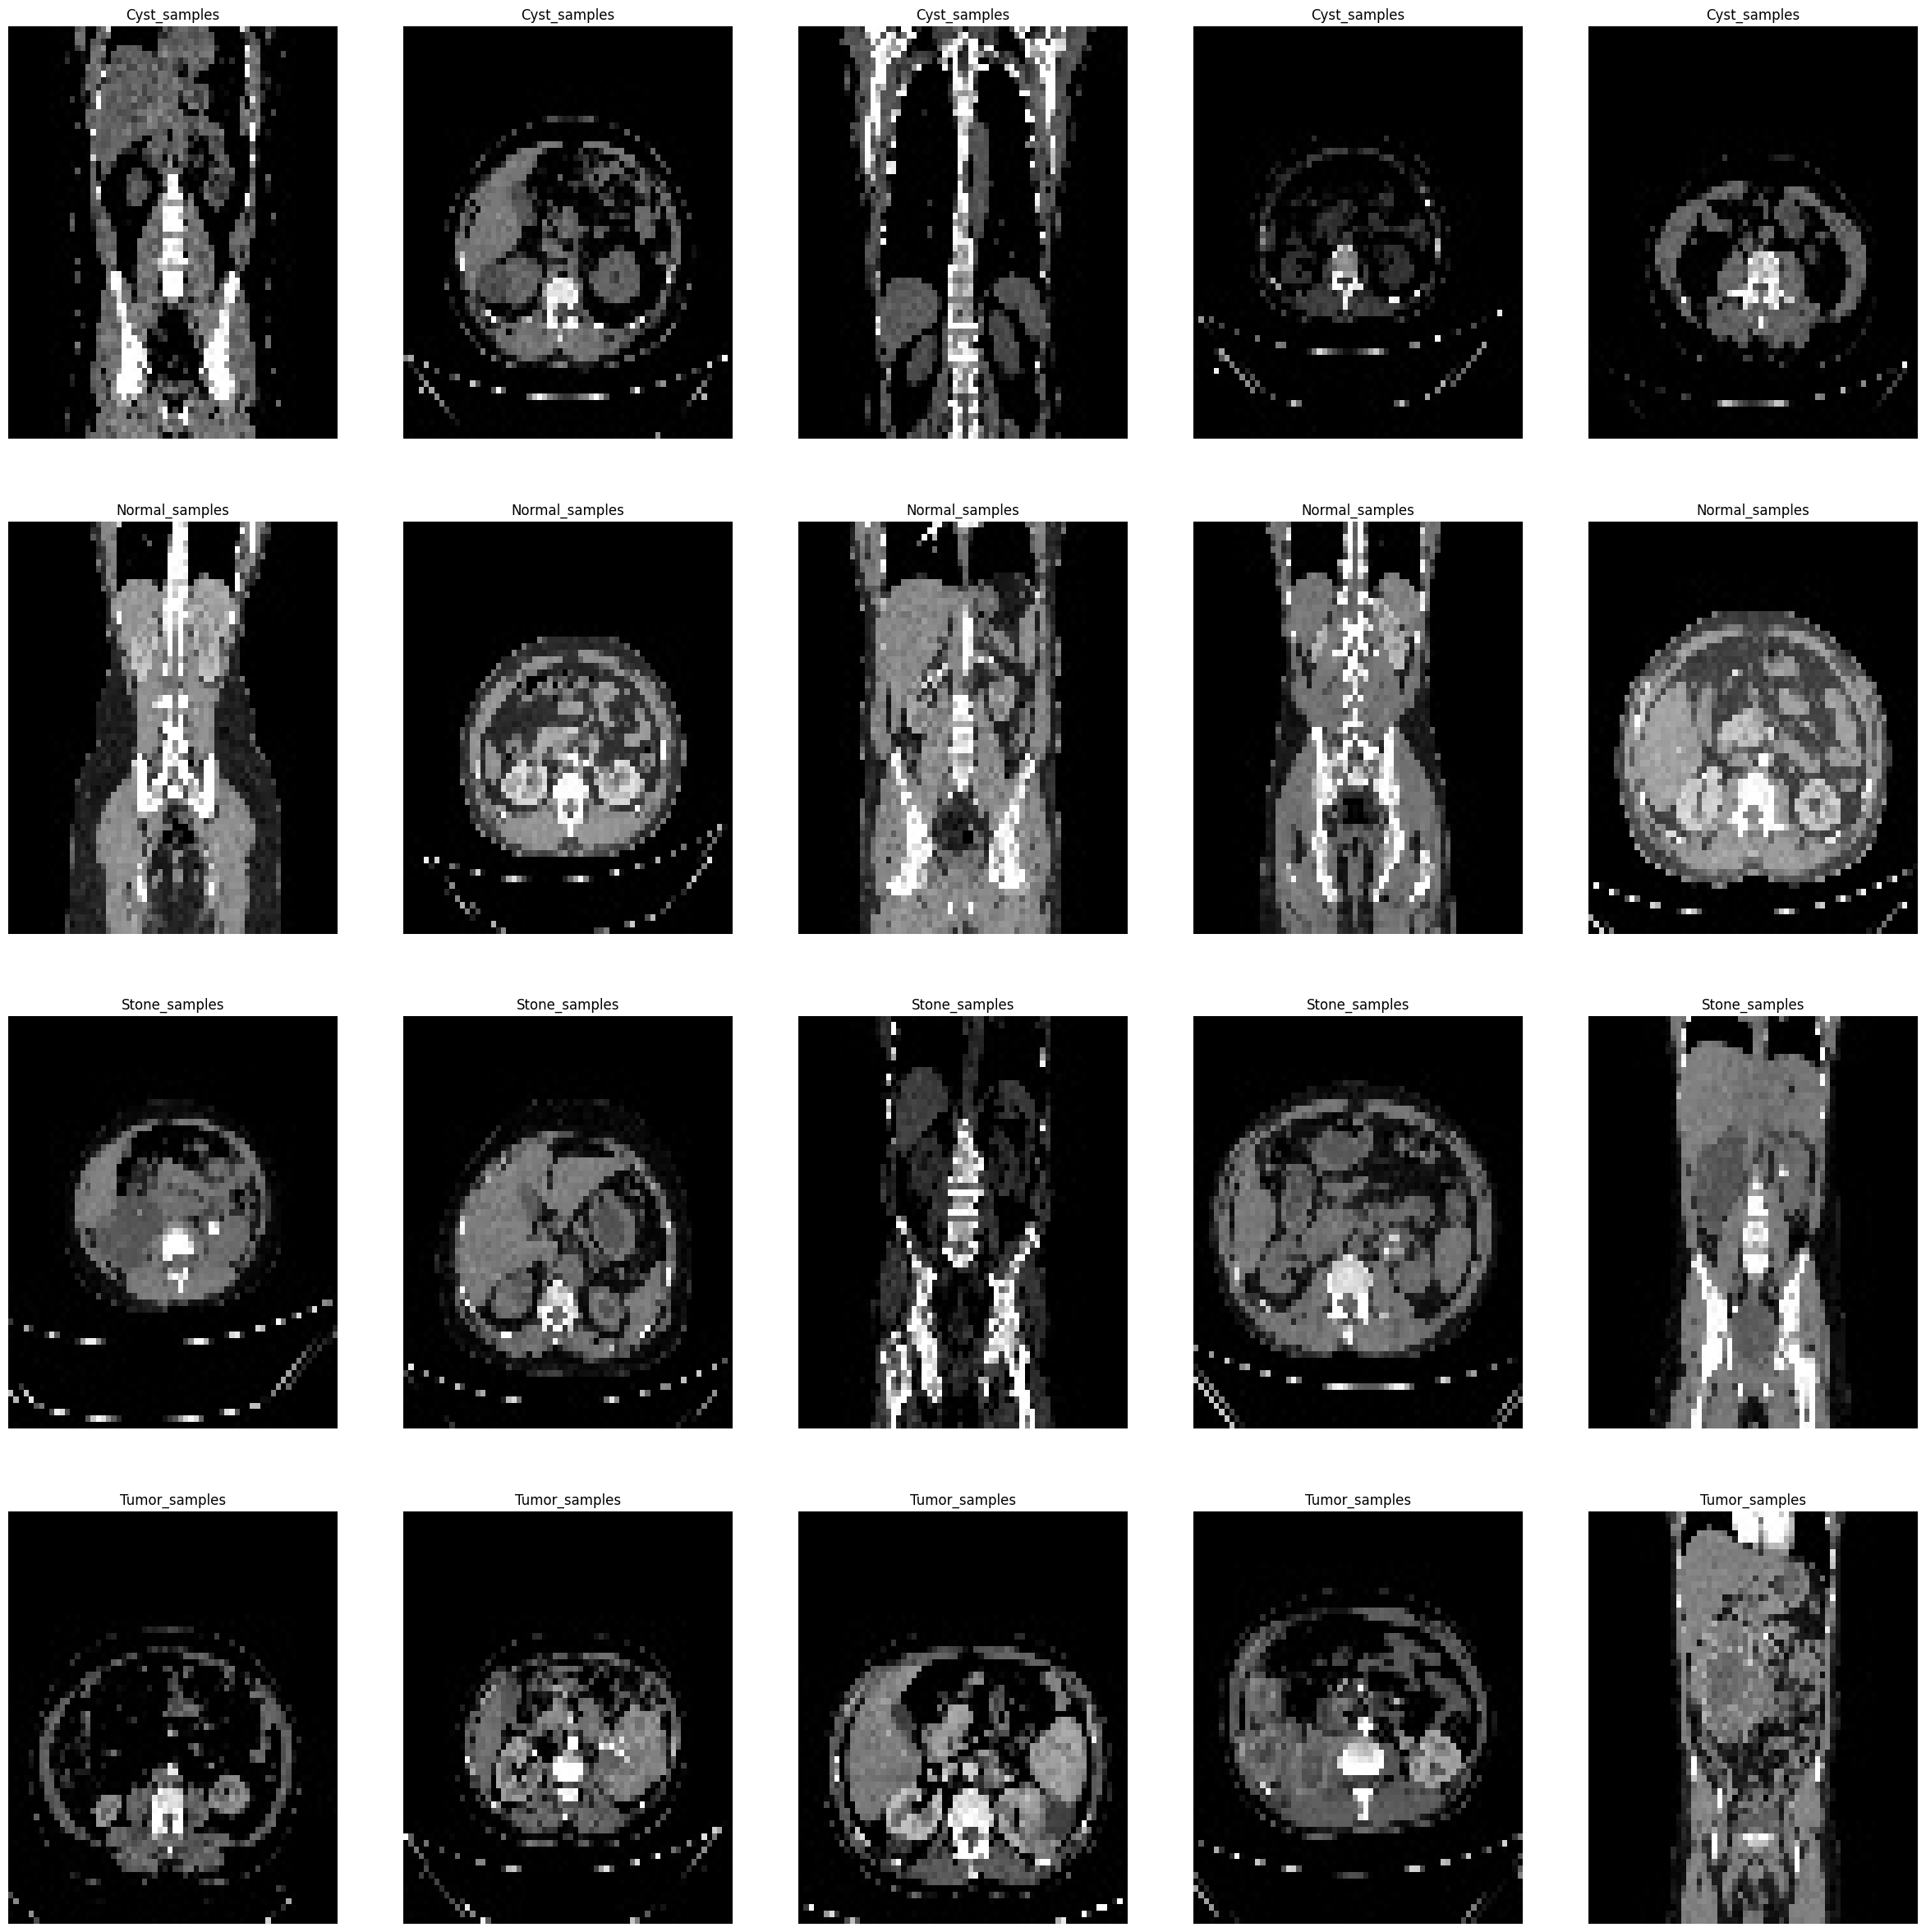

In [ ]:
f, ax = plt.subplots(4, 5,figsize=(30,30)) 

for i in range(20):
    img = imread(samples[i]) 
    ax[i//5, i%5].imshow(img, cmap='gray') 
    

    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")
    
 
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')

plt.show()
    

In [ ]:

Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [ ]:
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')
train_data = []
train_labels = []

In [ ]:

for img in Cyst_Cases:
    img = cv2.imread(str(img))
    if img.shape[2] == 1: 
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
    img = np.array(img)
    img = img/255  
    label = 'Cyst' 
    train_data.append(img)
    train_labels.append(label)

In [ ]:
for img in Normal_Cases:
    img = cv2.imread(str(img))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = 'Normal'
    train_data.append(img)
    train_labels.append(label)

In [ ]:
for img in Stone_Cases:
    img = cv2.imread(str(img))
    if img.shape[2] == 1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Stone"
    train_data.append(img)
    train_labels.append(label)

In [ ]:
for img in Tumor_Cases:
    img = cv2.imread(str(img))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Tumor"
    train_data.append(img)
    train_labels.append(label)

In [ ]:
train_data1 = np.array(train_data) 
train_labels1 = np.array(train_labels)
print('Total number of validation example: ', train_data1.shape)
print('Total number of Labels : ', train_labels1.shape)

Total number of validation example:  (12446, 64, 64, 3)
Total number of Labels :  (12446,)


In [ ]:
train_data1[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
train_labels1 = pd.DataFrame(train_labels1, columns = ['label'],index=None)
train_labels1

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst
...,...
12441,Tumor
12442,Tumor
12443,Tumor
12444,Tumor


In [ ]:
train_labels1['label'].unique()

array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [ ]:
train_labels1['label'] = train_labels1['label'].map({'Cyst':0,'Normal':1,'Stone':2,'Tumor':3})

In [ ]:
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
12441,3
12442,3
12443,3
12444,3


In [ ]:
print(train_data1.shape)
print(train_labels1.shape)

(12446, 64, 64, 3)
(12446, 1)


In [ ]:
train_labels1.isnull().sum()

label    0
dtype: int64

In [ ]:
train_data

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0., 0., 0.],
         [0., 0., 0.],
         

In [ ]:
from sklearn.model_selection import train_test_split

# Use the full, original dataset
X = train_data1
y = train_labels1

# Create a stratified split on the original data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Convert the y_train DataFrame to a 1D numpy array of labels
y_train_labels = y_train['label'].to_numpy()

# Calculate the class weights using the 1D array
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)

# Create a dictionary for Keras
class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.8389830508474576, 1: 0.6128306133933596, 2: 2.259336099585062, 3: 1.362953692115144}


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# A more gentle augmentation
datagen = ImageDataGenerator(
    rotation_range=10,      # Reduced rotation
    width_shift_range=0.05, # Reduced shift
    height_shift_range=0.05,# Reduced shift
    horizontal_flip=True,   # Horizontal flip is usually safe
    fill_mode='nearest'
)

# Apply it to your training data
datagen.fit(np.array(X_train))

In [ ]:
print("Training Data X : ",X_train.shape)
print("Testing Data X : ",X_test.shape)
print("Training Data y : ",y_train.shape)
print("Testing Data y : ",y_test.shape)
print("Validating Data X : ",X_val.shape)
print("Validating Data y",y_val.shape)
print("Image Size : ",X_train[0].shape)

Training Data X :  (8712, 64, 64, 3)
Testing Data X :  (1867, 64, 64, 3)
Training Data y :  (8712, 1)
Testing Data y :  (1867, 1)
Validating Data X :  (1867, 64, 64, 3)
Validating Data y (1867, 1)
Image Size :  (64, 64, 3)


In [ ]:
import tensorflow as tf
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=30, 
                    horizontal_flip=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 12544)             0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# A simpler, more robust baseline model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'), # A single dense layer
    Dropout(0.5), # A single, strong dropout layer for regularization
    
    Dense(4, activation='softmax') # Your output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train this simple model
# ... (your model definition and compile steps stay the same) ...

# ... (your model definition and compile steps stay the same) ...

history = model.fit(datagen.flow(np.array(X_train), np.array(y_train), batch_size=32),
                    epochs=30,
                    validation_data=(np.array(X_val), np.array(y_val)),
                    class_weight=class_weights_dict) # <-- Ensure this line is present

# Save the new, unbiased model with a new name
model.save("kidney_model_unbiased_v1.h5")
print("Unbiased model saved as kidney_model_unbiased_v1.h5")



Epoch 1/30
273/273 [==============================] - 6s 22ms/step - loss: 1.0802 - accuracy: 0.3085 - val_loss: 0.8516 - val_accuracy: 0.4713
Epoch 2/30
273/273 [==============================] - 6s 21ms/step - loss: 0.7424 - accuracy: 0.2645 - val_loss: 0.4356 - val_accuracy: 0.3166
Epoch 3/30
273/273 [==============================] - 6s 21ms/step - loss: 0.6073 - accuracy: 0.2681 - val_loss: 0.2672 - val_accuracy: 0.3396
Epoch 4/30
273/273 [==============================] - 6s 21ms/step - loss: 0.5232 - accuracy: 0.2734 - val_loss: 0.1916 - val_accuracy: 0.2989
Epoch 5/30
273/273 [==============================] - 6s 21ms/step - loss: 0.4538 - accuracy: 0.2666 - val_loss: 0.1357 - val_accuracy: 0.3005
Epoch 6/30
273/273 [==============================] - 6s 21ms/step - loss: 0.3834 - accuracy: 0.2713 - val_loss: 0.1514 - val_accuracy: 0.3091
Epoch 7/30
273/273 [==============================] - 6s 21ms/step - loss: 0.3579 - accuracy: 0.2740 - val_loss: 0.1837 - val_accuracy: 0.3214

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


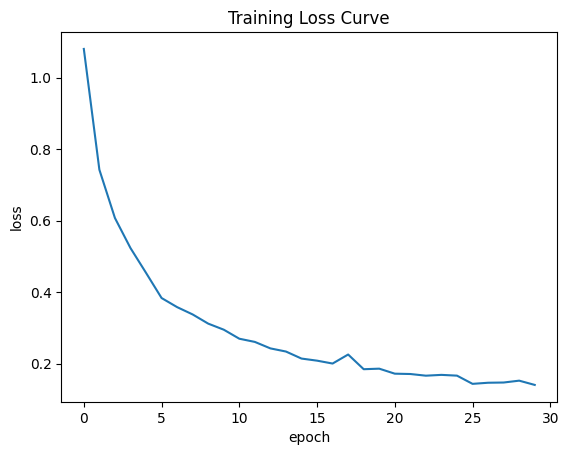

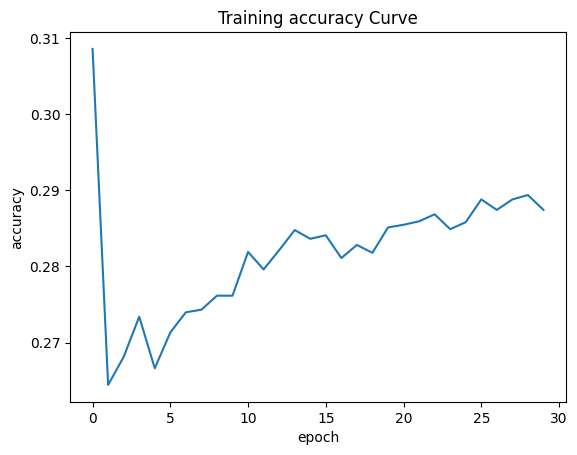

In [ ]:

plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training accuracy Curve")
plt.show()

In [ ]:

a = model.predict(X_test)
print(a)

59/59 [==============================] - 0s 6ms/step
[[1.19027431e-15 9.28079903e-01 2.97851674e-12 7.19200447e-02]
 [1.41187829e-13 9.99953032e-01 4.68816033e-05 8.08655471e-08]
 [3.01508161e-21 9.99999881e-01 1.25052577e-15 9.74531247e-08]
 ...
 [5.37117122e-11 1.89972669e-01 1.42761989e-08 8.10027301e-01]
 [9.85885024e-01 2.07358579e-17 1.41148595e-02 9.60977502e-08]
 [5.10619158e-10 7.28956652e-12 7.26203968e-14 1.00000000e+00]]


In [ ]:
b = []
for i in a:
    if i[0] > i[1] and i[0] > i[2] and i[0] > i[3]:
        b.append(0)
    elif i[1] > i[0] and i[1] > i[2] and i[1] > i[3]:
        b.append(1)
    elif i[2] > i[1] and i[2] > i[0] and i[2] > i[3]:
        b.append(2)
    else:
        b.append(3)

print(b)

[1, 1, 1, 1, 3, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 3, 3, 3, 0, 3, 0, 1, 0, 1, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 2, 0, 0, 0, 1, 1, 1, 3, 2, 1, 2, 0, 1, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 3, 2, 3, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 0, 0, 1, 1, 3, 0, 2, 1, 1, 0, 1, 1, 3, 0, 1, 3, 3, 0, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 3, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 1, 3, 0, 0, 1, 0, 3, 0, 0, 0, 1, 3, 1, 2, 0, 0, 0, 0, 1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 0, 1, 0, 0, 1, 1, 3, 1, 1, 3, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 3, 3, 3, 1, 1, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 2, 1, 3, 3, 1, 1, 0, 2, 3, 0, 3, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 3, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 3, 3, 0, 1, 3, 0, 3, 0, 2, 0, 3, 1, 2, 1, 1, 3, 1, 0, 1, 3, 0, 1, 3, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 3, 0, 2, 0, 1, 0, 3, 1, 0, 0, 0, 1, 0, 2, 3, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 0, 1, 0, 1, 3, 0, 1, 1, 3, 0, 3, 0, 1, 1, 0, 0, 2, 1, 2, 3, 0, 2, 3, 1, 0, 

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(y_test,b))
cm = confusion_matrix(y_test, b)
print("\n\nConfusion Matrix : \n\n",cm)

Accuracy Score :  0.9678628816282807


Confusion Matrix : 

 [[557   0   0   0]
 [  0 716   2  43]
 [ 10   0 192   5]
 [  0   0   0 342]]


[Text(0, 0.5, 'Cyst'),
 Text(0, 1.5, 'Normal'),
 Text(0, 2.5, 'Stone'),
 Text(0, 3.5, 'Tumor')]

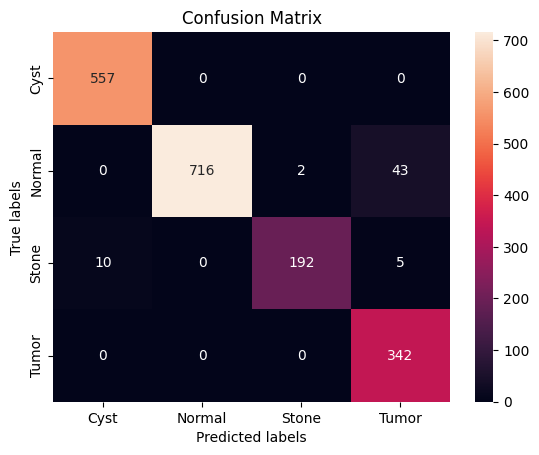

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor']) 
ax.yaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor'])

In [ ]:
print("F1 Score is :",f1_score(y_test,b,average='micro'))


F1 Score is : 0.9678628816282807


In [ ]:

# image='resized dataset/Resized Folder 64x64/Cyst/Cyst- (1052).jpg'

In [289]:
import cv2
import numpy as np

# --- Corrected Testing Code ---

# 1. Define the path to your image
image_path = 'n1.jpeg'  # Make sure this is the correct path to your image

# 2. Read the image
img = cv2.imread(image_path)

# 3. Resize the image to 64x64 (This was the missing step)
img_resized = cv2.resize(img, (64, 64))

# 4. Normalize the image (divide by 255)
img_normalized = img_resized / 255.0

# 5. Prepare the image for the model (add a batch dimension)
pic1 = np.array([img_normalized])

# 6. Now you can predict
a = model.predict(pic1)

# --- Your prediction logic stays the same ---
if a.argmax() == 0 :
    print("The detected disease is \"Cyst\"")
elif a.argmax() == 1 :
    print("Kidney is \"Normal\" ")
elif a.argmax() == 2:
    print("The detected disease is \"Stone\"")
else:
    print("The detected disease is \"Tumor\"")

1/1 [==============================] - 0s 13ms/step
The detected disease is "Tumor"
